In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

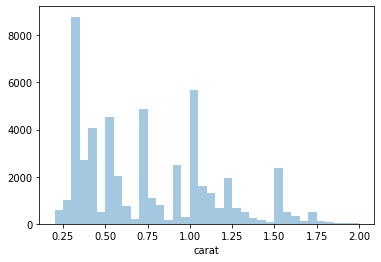

In [44]:
diamonds = sns.load_dataset('diamonds')
diamonds # notice shape, unit, key, etc...


# my turn: explore carats - how many are 0.99 vs 1 carat? why?

sns.distplot(diamonds['carat'],kde=False, bins=np.arange(0.2,2.05,.05).tolist())


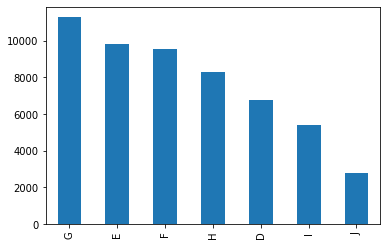

In [43]:
diamonds['color'].value_counts().plot.bar()

In [38]:
diamonds['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [39]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [45]:
# my turn: lets do the usual immediate explorations including the categorical vars

diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


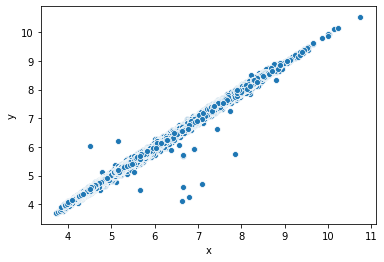

In [48]:
sns.scatterplot(data=diamonds.query('y < 15 & x > 2.5'),x='x',y='y')

In [50]:
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

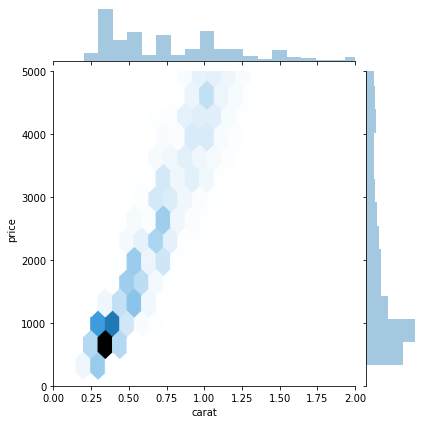

In [72]:
sns.jointplot(data=diamonds,x='carat',y='price',ylim=(0,5000),xlim=(0,2),kind='hex')

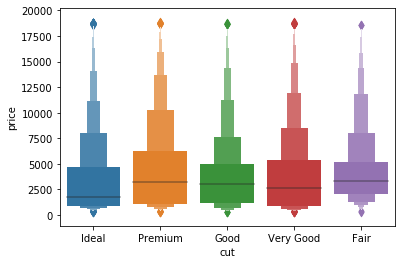

In [77]:
sns.boxenplot(data=diamonds,x='cut',y='price')

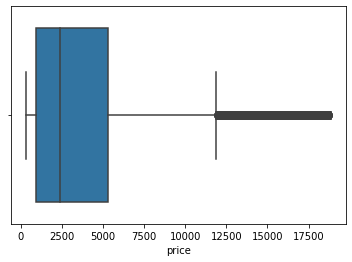

In [57]:
sns.boxplot(data=diamonds,x='price')

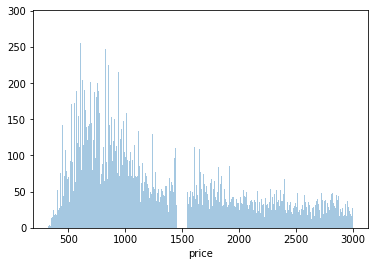

In [66]:
sns.distplot(diamonds.query('price<3000')['price'],kde=False, bins=500)

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr # you might need to install this (see above)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# don't copy and paste these lists and number in several places 
# (which is what the original "simple program" did... that's bad programming!)
# instead, create a var - if we change it here, it changes everywhere
stocks = ['AAPL','MSFT','VZ']
start_yr = 2000

# load
stock_prices = pdr.get_data_yahoo(stocks, start=start_yr)
stock_prices = stock_prices.filter(like='Adj Close') # reduce to just columns with this in the name
stock_prices.columns = stocks # put their tickers as column names
stock_prices # print

,AAPL,MSFT,VZ
Date,,,
2000-01-03,3.470226,37.495686,20.721500
2000-01-04,3.177650,36.229057,20.051672
2000-01-05,3.224152,36.611080,20.721500
2000-01-06,2.945139,35.384666,20.631170
2000-01-07,3.084645,35.847076,20.478834
2000-01-10,3.030393,36.108448,20.370028
2000-01-11,2.875386,35.183617,20.179594
2000-01-12,2.702940,34.037640,19.499504
2000-01-13,2.999391,34.680992,19.347162


In [2]:
# this is wide data... so if we want to create a new variable, we have to do it once for each firm...
# what if we have 1000 firms? seems tough to do...
# make long/tidy:
stock_prices = stock_prices.stack().swaplevel().sort_index().reset_index()
stock_prices.columns = ['Firm','Date','Adj Close']
stock_prices # print - now that is formatted nicely, like CRSP! 

# note: we might have to tweak the regression section of "Simple Program"
# to work with the long data, but I suspect that it would be shorter code and 
# more "generally applicable" (ie easily work with N=1000+ firms)

,Firm,Date,Adj Close
0,AAPL,2000-01-03,3.470226
1,AAPL,2000-01-04,3.177650
2,AAPL,2000-01-05,3.224152
3,AAPL,2000-01-06,2.945139
4,AAPL,2000-01-07,3.084645
5,AAPL,2000-01-10,3.030393
6,AAPL,2000-01-11,2.875386
7,AAPL,2000-01-12,2.702940
8,AAPL,2000-01-13,2.999391
9,AAPL,2000-01-14,3.113708


In [3]:
# add return var.
# MAKE SURE YOU CREATE THE VARIABLES WITHIN EACH FIRM - use groupby
stock_prices['ret'] = stock_prices.groupby('Firm')['Adj Close'].pct_change()
stock_prices # print - the first ret for each firm should be missing...

,Firm,Date,Adj Close,ret
0,AAPL,2000-01-03,3.470226,NaN
1,AAPL,2000-01-04,3.177650,-0.084310
2,AAPL,2000-01-05,3.224152,0.014634
3,AAPL,2000-01-06,2.945139,-0.086538
4,AAPL,2000-01-07,3.084645,0.047368
5,AAPL,2000-01-10,3.030393,-0.017588
6,AAPL,2000-01-11,2.875386,-0.051151
7,AAPL,2000-01-12,2.702940,-0.059973
8,AAPL,2000-01-13,2.999391,0.109678
9,AAPL,2000-01-14,3.113708,0.038113


In [4]:
stock_prices.isnull().sum()

Firm         0
Date         0
Adj Close    0
ret          3
dtype: int64

In [6]:
stock_prices.groupby('Firm')['ret'].describe()

,count,mean,std,min,25%,50%,75%,max
Firm,,,,,,,,
AAPL,5061.0,0.001234,0.025349,-0.518692,-0.010324,0.000897,0.012945,0.139049
MSFT,5061.0,0.000495,0.018965,-0.155977,-0.008039,0.000338,0.008929,0.195652
VZ,5061.0,0.000323,0.015348,-0.118461,-0.007233,0.000394,0.007704,0.146324


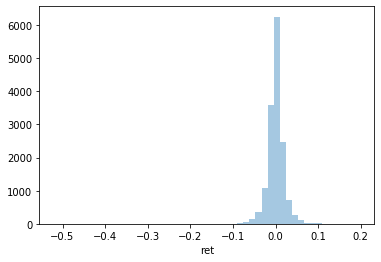

In [10]:
sns.distplot(stock_prices['ret'].dropna(),kde=False)

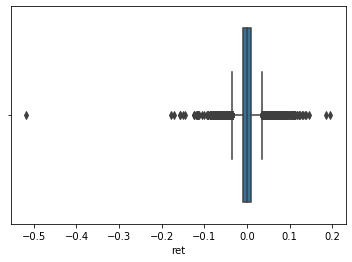

In [12]:
sns.boxplot(stock_prices['ret'].dropna())

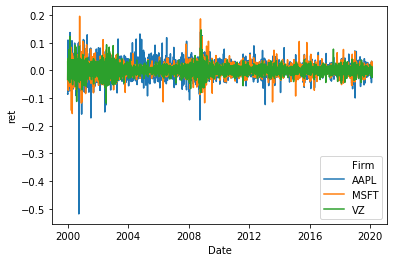

In [25]:
sns.lineplot(stock_prices['Date'],stock_prices['ret'].dropna(),hue=stock_prices['Firm'])